<font size="7"><b>Previsão de tráfego do site</b></font>




In [ ]:
# Importação das Bobliotecas Necessárias

import requests
# Importação das Boblioteca de Dados
import pandas as pd
import numpy as np
# Importação das Boblioteca de Plotagem
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importação das Boblioteca de Modelos Estatisticos
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# Ignorando Avisos
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Lendo dados da base utilizada CSV
trafego_site = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Thecleverprogrammer.csv")
print("Dados Lidos com Sucesso")

Dados Lidos com Sucesso


In [8]:
#Consultando as colunas do dataset 1
trafego_site.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [9]:
#Verificando o tipo de dados das colunas
trafego_site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
Date     391 non-null object
Views    391 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [12]:
#Convertendo o formato da coluna para Data
trafego_site["Date"] = pd.to_datetime(trafego_site["Date"], format = "%d/%m/%Y")

#Verificando o tipo de dados das colunas
trafego_site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
Date     391 non-null datetime64[ns]
Views    391 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


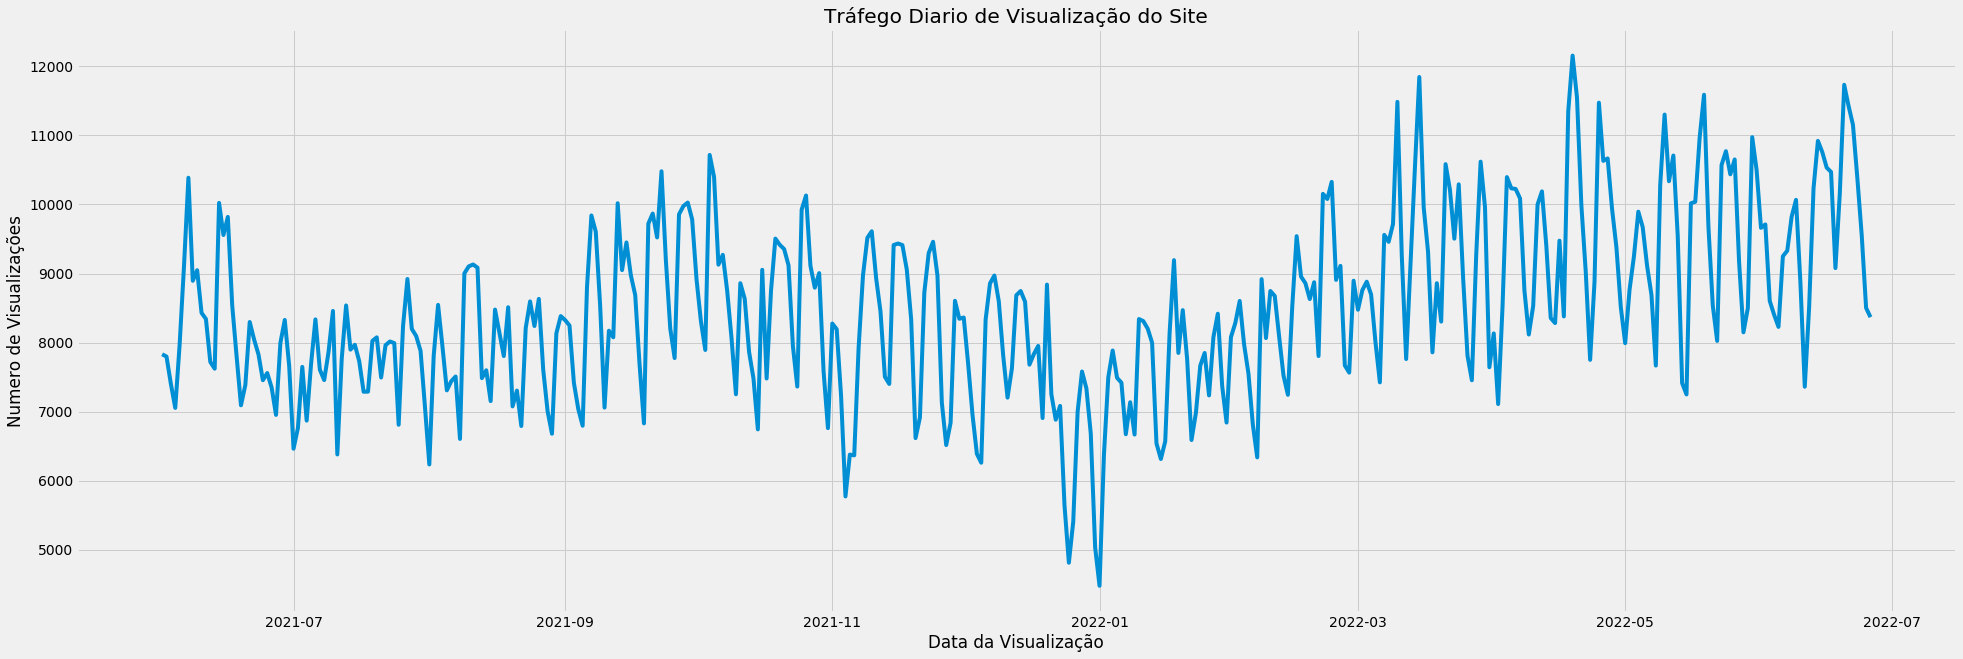

In [20]:
#Verificando como esta distribuido as visualizações do site durante o periodo
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30,10))
plt.plot(trafego_site['Date'],trafego_site['Views'])
plt.title('Tráfego Diario de Visualização do Site')
plt.xlabel('Data da Visualização')
plt.ylabel('Numero de Visualizações')
plt.show()

<Figure size 432x288 with 0 Axes>

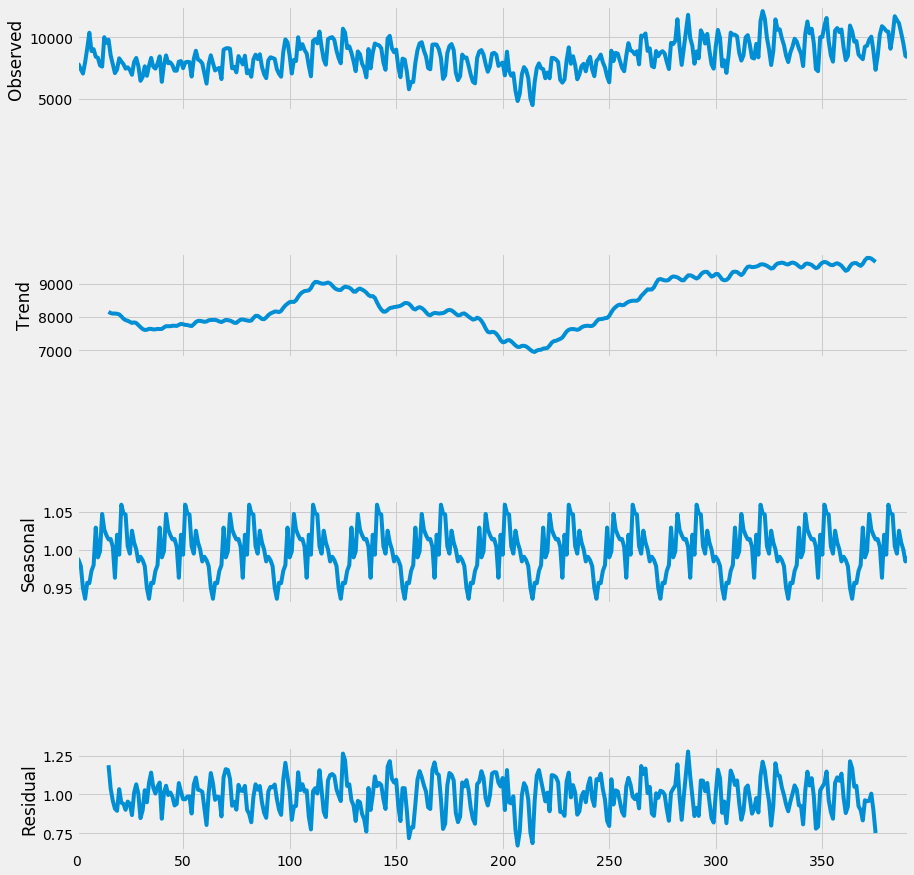

In [23]:
#Verificando a sasionalidade, tendencia dos dados 

resutado = seasonal_decompose(trafego_site['Views'], 
                              model = 'multiplicative',
                              freq = 30)

fig = plt.figure()
fig = resutado.plot()
fig.set_size_inches(15,15)


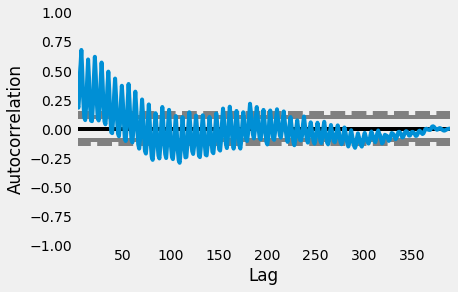

In [24]:
#traçando a autocorrelação da coluna Views
pd.plotting.autocorrelation_plot(trafego_site['Views'])

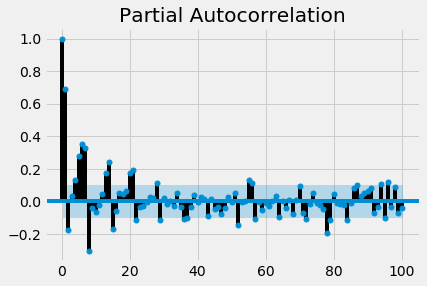

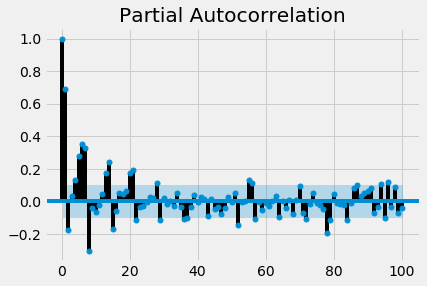

In [26]:
#traçando a autocorrelação parcial da coluna Views
plot_pacf(trafego_site['Views'], lags = 100)

In [29]:
#Construindo um modelo SARIMA:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(trafego_site['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.346
Date:                            Mon, 25 Jul 2022   AIC                           6228.692
Time:                                    12:21:26   BIC                           6287.715
Sample:                                         0   HQIC                          6252.117
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7917      0.133      5.936      0.000       0.530       1.053
ar.L2         -0.7975      0.135   

In [32]:
# Predições dos proximos 50 intervalos
predictions = model.predict(len(trafego_site), len(trafego_site)+50)
print(predictions)

391     9860.279149
392    10768.981639
393    10755.790995
394     9863.103634
395     8765.313227
           ...     
487     9542.567852
488     9803.693251
489    10655.235196
490    11029.612674
491    10993.127766
Length: 101, dtype: float64


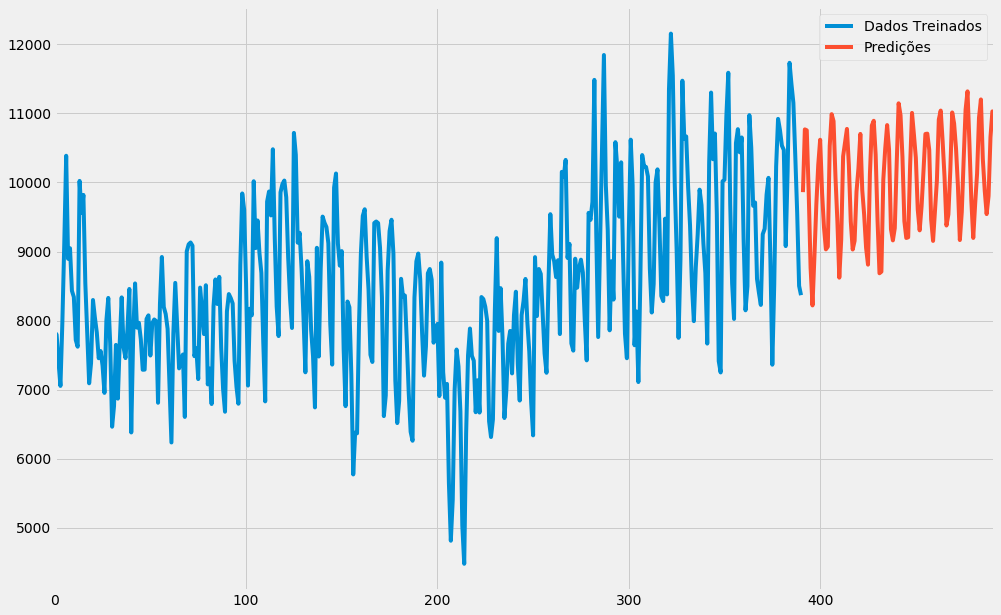

In [33]:
# Plotando predições dos proximos 50 intervalos
trafego_site["Views"].plot(legend=True, label="Dados Treinados", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predições")

<font size= '7'><b>Resumo</b><font>

Nesse estudo foi possivel prever o tráfego do site para um determinado período.</br> Usando tecnicas de series temporais para analisar a sasionalidade dos dados e sua tendencia